In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
from night import night
from dict_legend import dict_var_disp
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

In [2]:
path_runcontrol = Path('baserun')/ 'RunControl.nml'
df_state_init = sp.init_supy(path_runcontrol)
grid = df_state_init.index[0]
df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

sp.show_version()

2020-06-29 15:25:18,662 - SuPy - INFO - All cache cleared.
2020-06-29 15:25:20,317 - SuPy - INFO - All cache cleared.
SuPy versions
-------------
supy: 2020.5.25dev
supy_driver: 2020a8

SYSTEM DEPENDENCY

INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.0.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.3
numpy            : 1.18.3
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.1.1
setuptools       : 45.2.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.3.3
html5lib         : None
pymysql          : None
psycopg2         : 2.8.4 (dt dec 

#### Examine Forcing data 

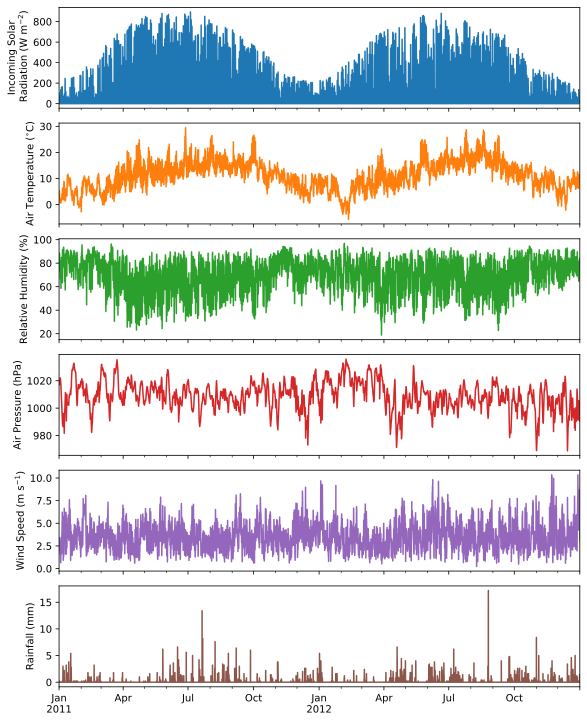

In [3]:

list_var_forcing = [
    'kdown',
    'Tair',
    'RH',
    'pres',
    'U',
    'rain',
]
dict_var_label = {
    'kdown': 'Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)',
    'Tair': 'Air Temperature ($^{\circ}}$C)',
    'RH': r'Relative Humidity (%)',
    'pres': 'Air Pressure (hPa)',
    'rain': 'Rainfall (mm)',
    'U': 'Wind Speed (m $\mathrm{s^{-1}}$)'
}
df_plot_forcing_x = df_forcing.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(8, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])


#### Two scenario Used
 1. Initial conditions used in sample data - Used Suffix: none
 2. Building fraction = 0.05 grass = .36 - Population day/night = 5% of initial - Used Suffix: _rb      ("Rural"conditions with Building)


In [4]:
df_state_rb = df_state_init.copy()
df_state_rb.loc[:, ('sfr', '(1,)')] = .05 #Building
df_state_rb.loc[:, ('sfr', '(4,)')] = 0.36 #Grass
df_state_rb.popdensdaytime = df_state_init.popdensdaytime * 0.05
df_state_rb.popdensnighttime = df_state_init.popdensnighttime * 0.05 
sp.check_state(df_state_rb)

2020-06-29 15:26:03,746 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-29 15:26:03,903 - SuPy - INFO - All checks for `df_state` passed!


In [5]:
# Run SuPy initial conditions
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)
df_output_suews = df_output['SUEWS']

# Run SuPy with modified environment add _rb for recognition later on
df_rb_output, df_state_rb_final = sp.run_supy(df_forcing, df_state_rb)
df_rb_output_suews = df_rb_output['SUEWS']
df_rb_output_suews = df_rb_output_suews.add_suffix('_rb')

2020-06-29 15:28:45,050 - SuPy - INFO - ====================
2020-06-29 15:28:45,050 - SuPy - INFO - Simulation period:
2020-06-29 15:28:45,050 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2020-06-29 15:28:45,050 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-29 15:28:45,050 - SuPy - INFO - 
2020-06-29 15:28:45,050 - SuPy - INFO - No. of grids: 1
2020-06-29 15:28:45,050 - SuPy - INFO - SuPy is running in serial mode
2020-06-29 15:29:36,731 - SuPy - INFO - Execution time: 51.7 s
2020-06-29 15:29:36,731 - SuPy - INFO - ====================

2020-06-29 15:29:36,731 - SuPy - INFO - ====================
2020-06-29 15:29:36,731 - SuPy - INFO - Simulation period:
2020-06-29 15:29:36,731 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2020-06-29 15:29:36,731 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-29 15:29:36,731 - SuPy - INFO - 
2020-06-29 15:29:36,731 - SuPy - INFO - No. of grids: 1
2020-06-29 15:29:36,731 - SuPy - INFO - SuPy is running in serial mode
2020-06-29 15:31:23,035 - S

In [6]:
# RSL
df_output_rsl = df_output['RSL']
df_output_rsl_g = df_output_rsl.loc[grid]
df_output_rsl_rb = df_rb_output['RSL']
df_output_rsl_rb = df_output_rsl_rb.add_suffix('_rb')
df_output_rsl_rb_g = df_output_rsl_rb.loc[grid]

In [7]:
# Merge to one dataframe for easier plotting
df_output_suews_g = df_output_suews.loc[grid]
df_rb_output_suews_g = df_rb_output_suews.loc[grid]

df_merge = pd.concat([df_output_suews_g,df_rb_output_suews_g],axis=1,join='inner')
df_rsl = pd.concat([df_output_rsl_g,df_output_rsl_rb_g],axis=1,join='inner')

# Calculate Diffrence (Initial) - (Scenario)= . Suffix used  _d or Δ 
 

In [9]:
init_col = list(df_output_suews)
rb_col = list(df_rb_output_suews)

for i, rbd, rb in zip(init_col,[sub + '_d' for sub in rb_col],rb_col):
    df_merge[rbd] = df_merge[i] - df_merge[rb]

## For closer analysis, a timespan from 20th of july to 29th of july is chosen. The period is characterised by having calm and clear days with low wind from 22-27th july

In [10]:
# Start and end date
s = '2012 7 20'
e = '2012 7 29'
size = 10, 7

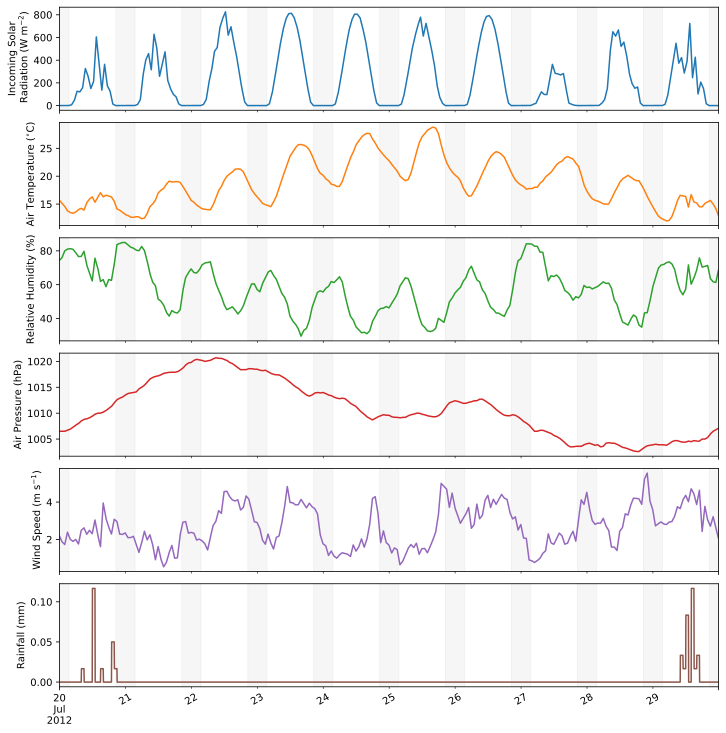

In [11]:
df_plot_forcing_x = df_forcing.loc[s:e, list_var_forcing].copy().shift(
    -1).dropna(how='any')
axes = df_plot_forcing_x.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])
    night(ax)

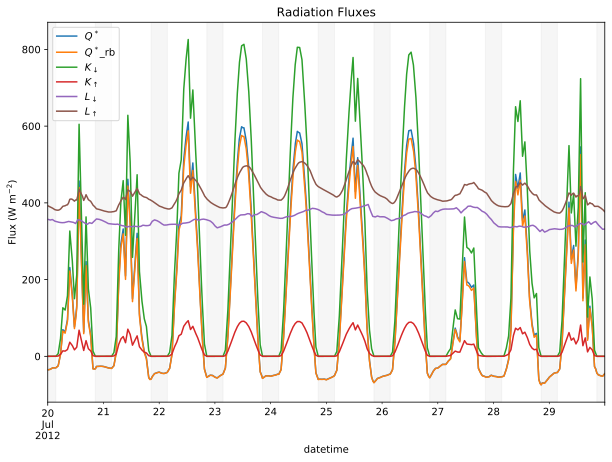

In [12]:
ax_output = df_merge.loc[s:e,['QN','QN_rb','Kdown', 'Kup', 'Ldown', 'Lup']].rename(columns=dict_var_disp).plot(figsize=(size))
ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
ax_output.legend()
plt.title('Radiation Fluxes')
night(ax_output)

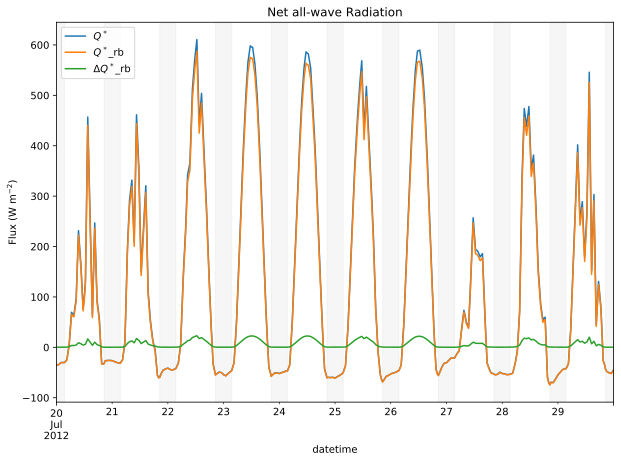

In [13]:
ax_output = df_merge.loc[s:e,['QN','QN_rb','QN_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
ax_output.legend()
plt.title('Net all-wave Radiation')
night(ax_output)


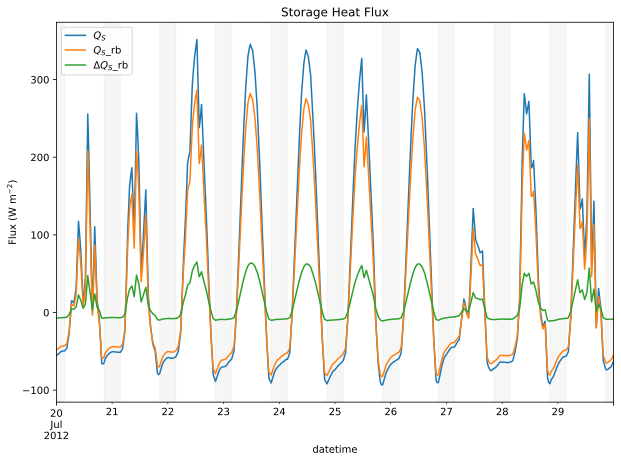

In [14]:
ax_output = df_merge.loc[s:e,['QS','QS_rb','QS_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
ax_output.legend()
plt.title('Storage Heat Flux')
night(ax_output)

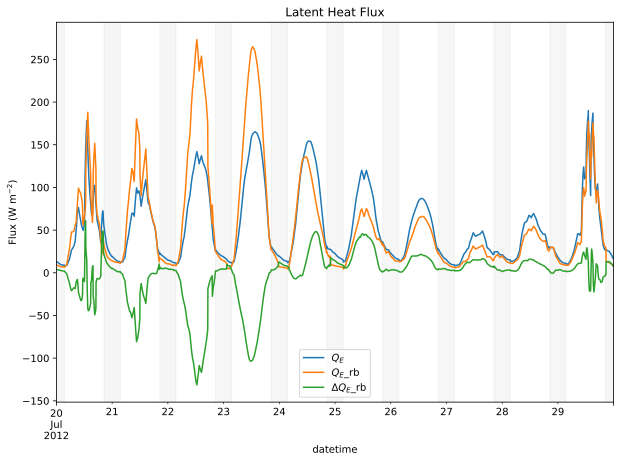

In [17]:
ax_output = df_merge.loc[s:e,['QE','QE_rb','QE_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
ax_output.legend()
plt.title('Latent Heat Flux')
night(ax_output)

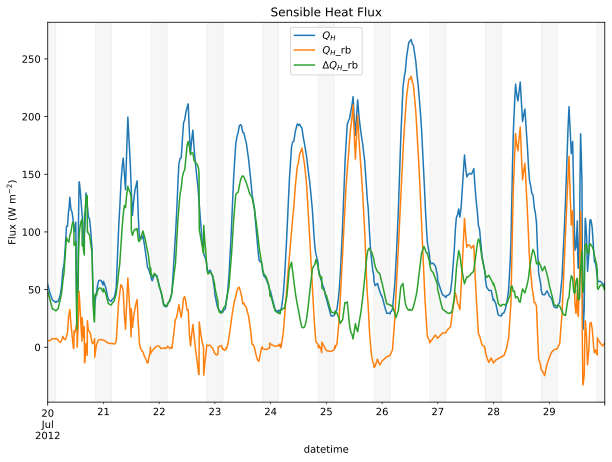

In [18]:
ax_output = df_merge.loc[s:e,['QH','QH_rb','QH_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
ax_output.legend()
plt.title('Sensible Heat Flux')
night(ax_output)

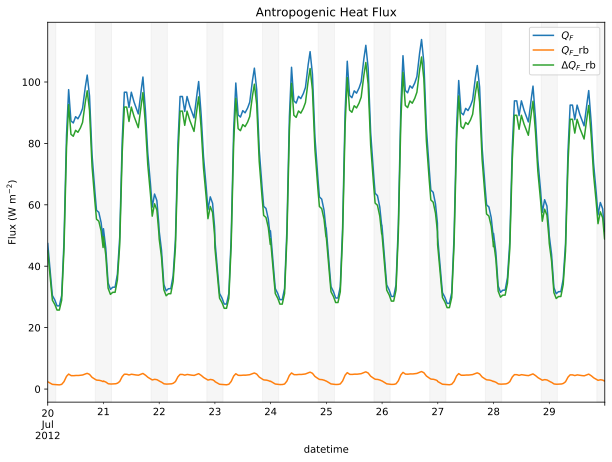

In [19]:
ax_output = df_merge.loc[s:e,['QF','QF_rb','QF_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
ax_output.legend()
plt.title('Antropogenic Heat Flux')
night(ax_output)

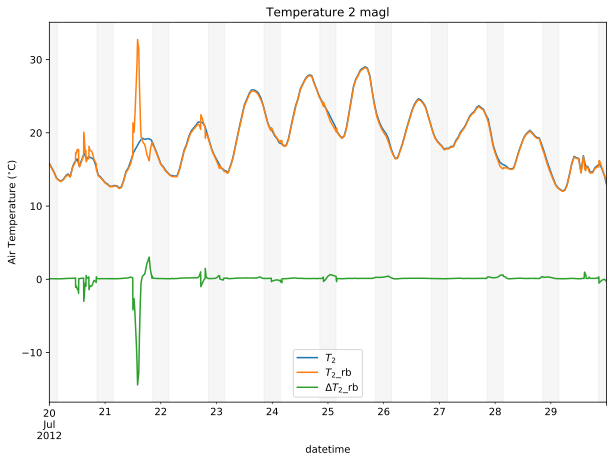

In [20]:
ax_output = df_merge.loc[s:e,['T2','T2_rb','T2_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.set_ylabel('Air Temperature ($^{\\circ}}$C)')
ax_output.legend()
plt.title('Temperature 2 magl')
night(ax_output)


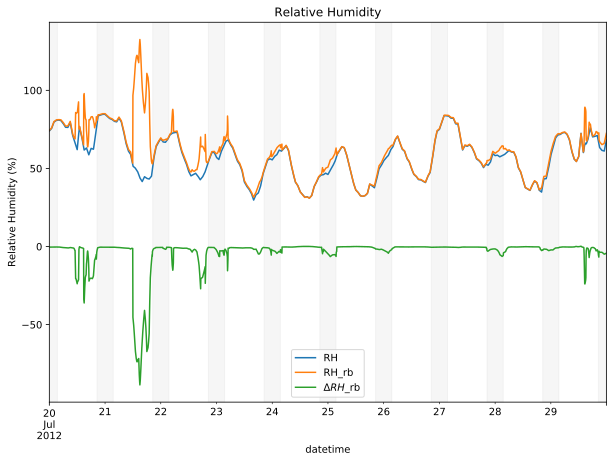

In [21]:
ax_output = df_merge.loc[s:e,['RH2','RH2_rb','RH2_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.set_ylabel('Relative Humidity (%)')
ax_output.legend()
plt.title('Relative Humidity')
night(ax_output)



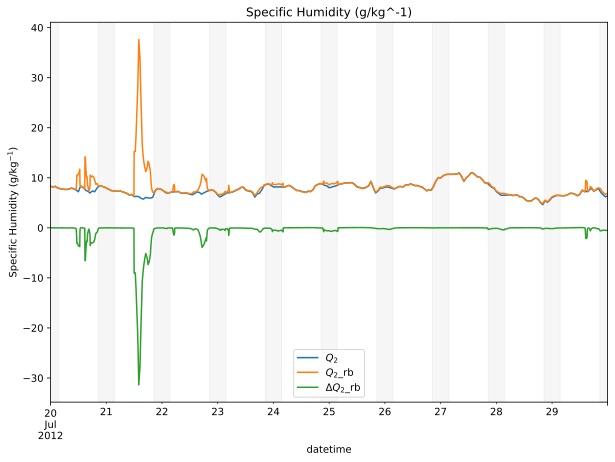

In [24]:
ax_output = df_merge.loc[s:e,['Q2','Q2_rb','Q2_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.set_ylabel('Specific Humidity (g/$ \mathrm{kg^{-1}}$)')
ax_output.legend()
plt.title('Specific Humidity (g/kg^-1)')
night(ax_output)


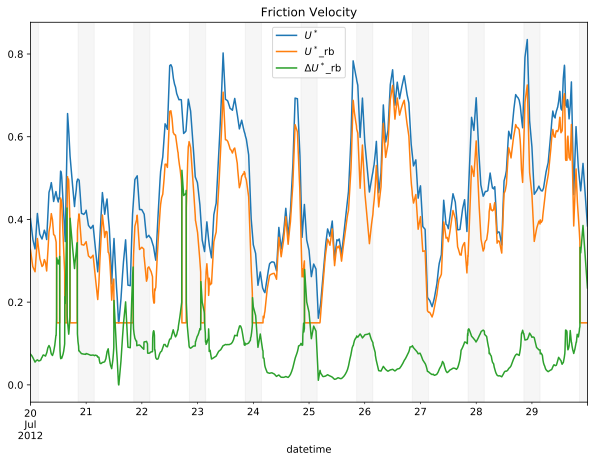

In [25]:
ax_output = df_merge.loc[s:e,['UStar','UStar_rb','UStar_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.legend()
plt.title('Friction Velocity')
night(ax_output)


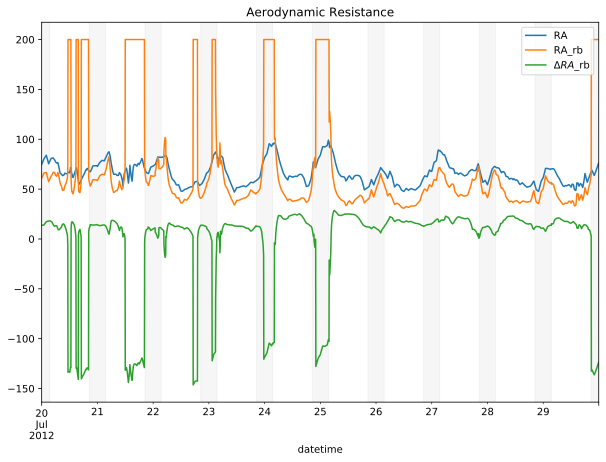

In [26]:
ax_output = df_merge.loc[s:e,['RA','RA_rb','RA_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.legend()
plt.title('Aerodynamic Resistance')
night(ax_output)


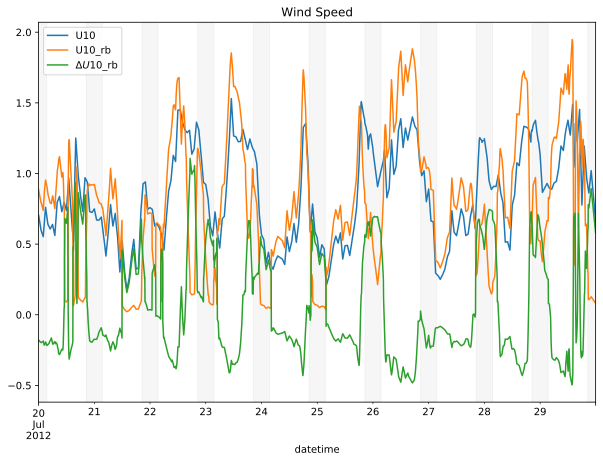

In [27]:
ax_output = df_merge.loc[s:e,['U10','U10_rb','U10_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.legend()
plt.title('Wind Speed')
night(ax_output)


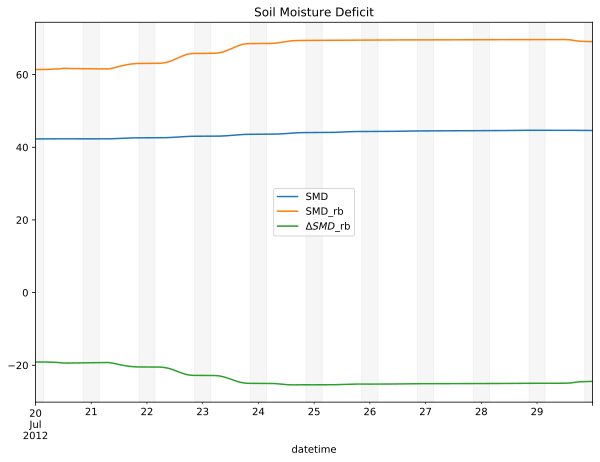

In [28]:
ax_output = df_merge.loc[s:e,['SMD','SMD_rb','SMD_rb_d']].rename(columns=dict_var_disp).plot(figsize=size)
ax_output.legend()
plt.title('Soil Moisture Deficit')
night(ax_output)

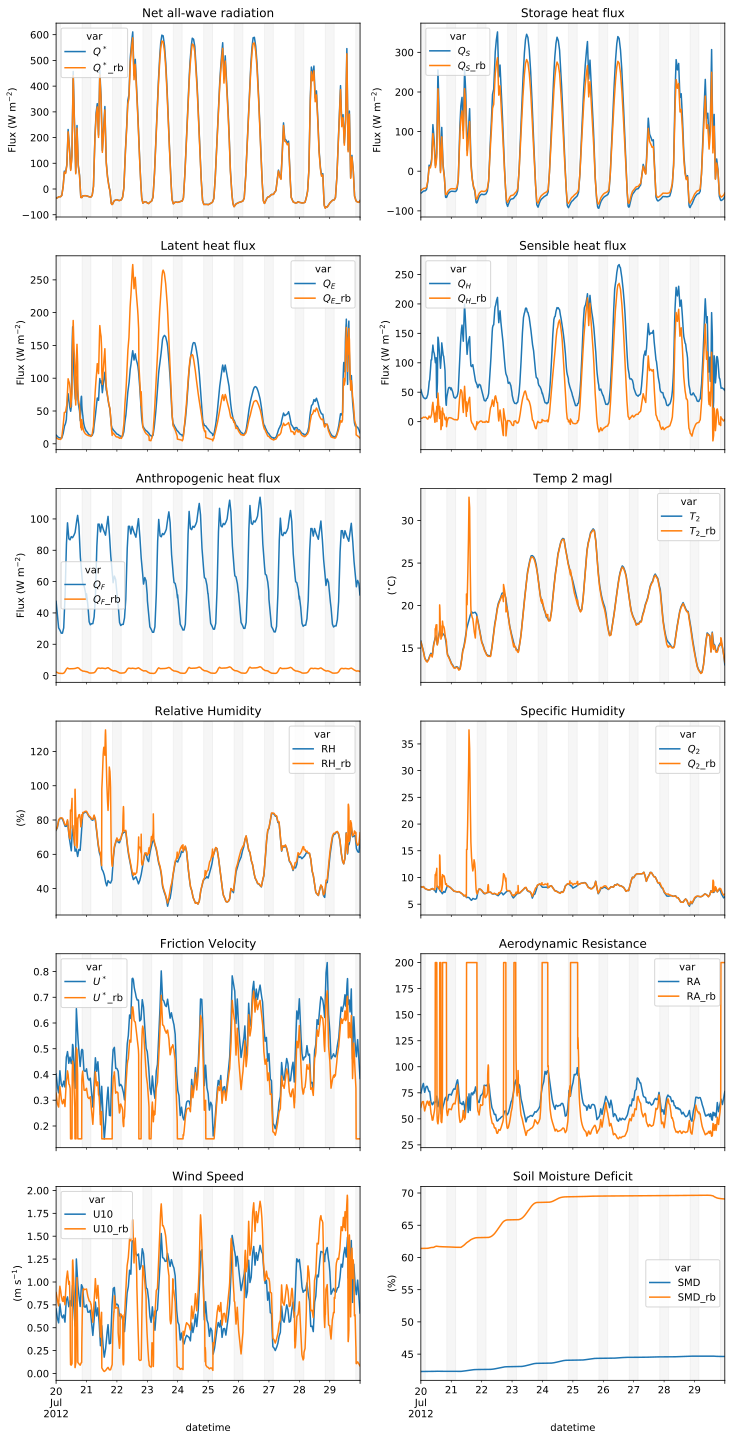

In [29]:
fsize = (12,25)
fig, axes = plt.subplots(6, 2, sharex=True)
# QN
a = df_merge.loc[s : e ,['QN','QN_rb']].rename(columns=dict_var_disp).plot(ax=axes[0,0],figsize=fsize,title='Net all-wave radiation')
b = df_merge.loc[s : e ,['QS','QS_rb']].rename(columns=dict_var_disp).plot(ax=axes[0,1],figsize=fsize,title='Storage heat flux',)
c = df_merge.loc[s : e ,['QE','QE_rb']].rename(columns=dict_var_disp).plot(ax=axes[1,0],figsize=fsize,title='Latent heat flux')
d = df_merge.loc[s : e ,['QH','QH_rb']].rename(columns=dict_var_disp).plot(ax=axes[1,1],figsize=fsize,title='Sensible heat flux')
e1= df_merge.loc[s : e ,['QF','QF_rb']].rename(columns=dict_var_disp).plot(ax=axes[2,0],figsize=fsize,title='Anthropogenic heat flux',)
f = df_merge.loc[s : e ,['T2','T2_rb']].rename(columns=dict_var_disp).plot(ax=axes[2,1],figsize=fsize,title='Temp 2 magl')
g = df_merge.loc[s : e ,['RH2','RH2_rb']].rename(columns=dict_var_disp).plot(ax=axes[3,0],figsize=fsize,title='Relative Humidity')
h = df_merge.loc[s : e ,['Q2','Q2_rb']].rename(columns=dict_var_disp).plot(ax=axes[3,1],figsize=fsize,title='Specific Humidity')
i = df_merge.loc[s : e ,['UStar','UStar_rb']].rename(columns=dict_var_disp).plot(ax=axes[4,0],figsize=fsize,title='Friction Velocity')
j = df_merge.loc[s : e ,['RA','RA_rb']].rename(columns=dict_var_disp).plot(ax=axes[4,1],figsize=fsize,title='Aerodynamic Resistance')
k = df_merge.loc[s : e ,['U10','U10_rb']].plot(ax=axes[5,0],figsize=fsize,title='Wind Speed')
l = df_merge.loc[s : e ,['SMD','SMD_rb']].rename(columns=dict_var_disp).plot(ax=axes[5,1],figsize=fsize,title='Soil Moisture Deficit')

axes[0,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[0,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[2,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[2,1].set_ylabel('($^{\\circ}}$C)')
axes[3,0].set_ylabel('(%)')
axes[5,0].set_ylabel('(m $\mathrm{s^{-1}}$)')
axes[5,1].set_ylabel('(%)')

for var in [a,b,c,d,e1,f,g,h,i,j,k,l]:
    night(var)
    

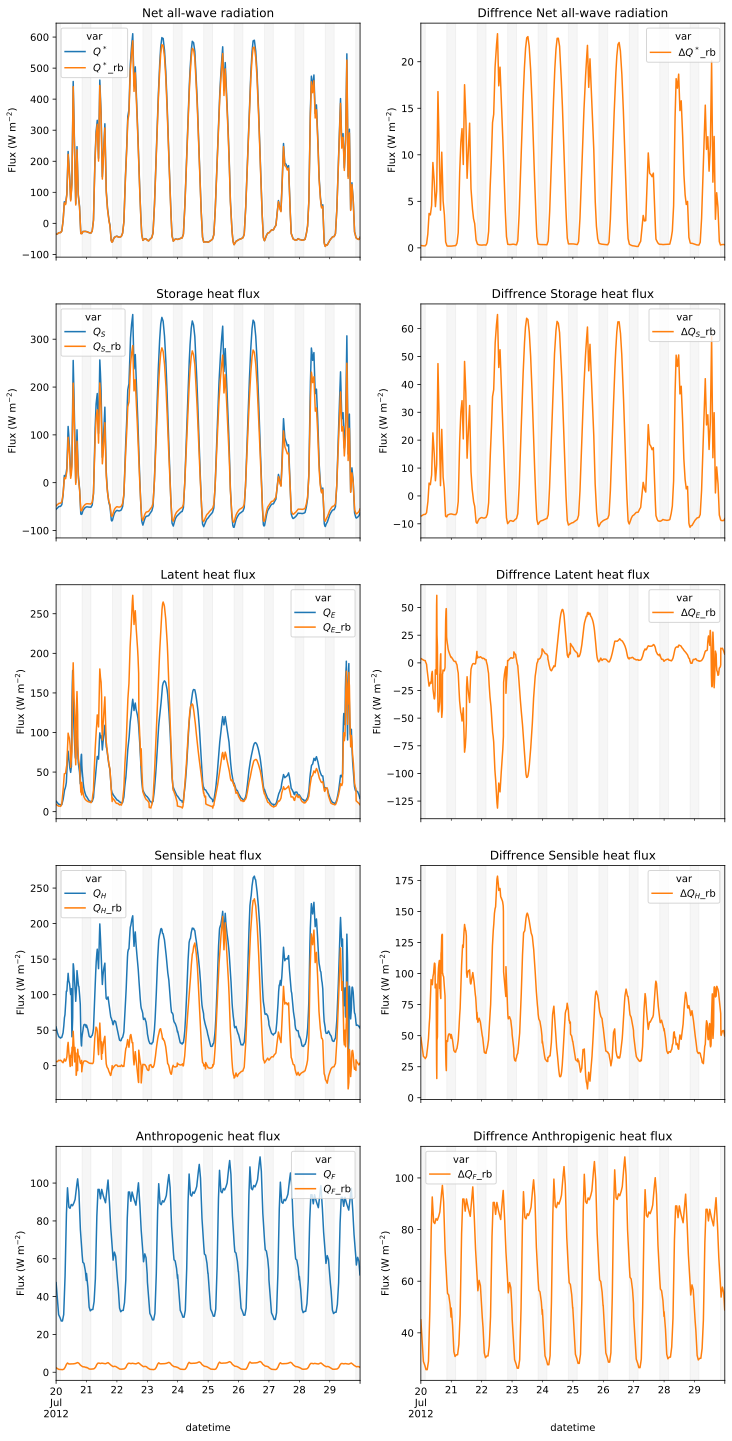

In [30]:
fig, axes = plt.subplots(5, 2, sharex=True)
clr= ('#ff7f0e','#2ca02c')

a = df_merge.loc[s : e ,['QN','QN_rb']].rename(columns=dict_var_disp).plot(ax=axes[0,0],figsize=fsize,title='Net all-wave radiation')
b = df_merge.loc[s : e ,['QN_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[0,1],figsize=fsize,title='Diffrence Net all-wave radiation',color=clr)
c = df_merge.loc[s : e ,['QS','QS_rb']].rename(columns=dict_var_disp).plot(ax=axes[1,0],figsize=fsize,title='Storage heat flux')
d = df_merge.loc[s : e ,['QS_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[1,1],figsize=fsize,title='Diffrence Storage heat flux',color=clr)
e1= df_merge.loc[s : e ,['QE','QE_rb']].rename(columns=dict_var_disp).plot(ax=axes[2,0],figsize=fsize,title='Latent heat flux')
f = df_merge.loc[s : e ,['QE_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[2,1],figsize=fsize,title='Diffrence Latent heat flux',color=clr)
g = df_merge.loc[s : e ,['QH','QH_rb']].rename(columns=dict_var_disp).plot(ax=axes[3,0],figsize=fsize,title='Sensible heat flux')
h = df_merge.loc[s : e ,['QH_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[3,1],figsize=fsize,title='Diffrence Sensible heat flux',color=clr)
i = df_merge.loc[s : e ,['QF','QF_rb']].rename(columns=dict_var_disp).plot(ax=axes[4,0],figsize=fsize,title='Anthropogenic heat flux')
j = df_merge.loc[s : e ,['QF_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[4,1],figsize=fsize,title='Diffrence Anthropigenic heat flux',color=clr)
for var in [a,b,c,d,e1,f,g,h,i,j]:
    night(var)
    var.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')



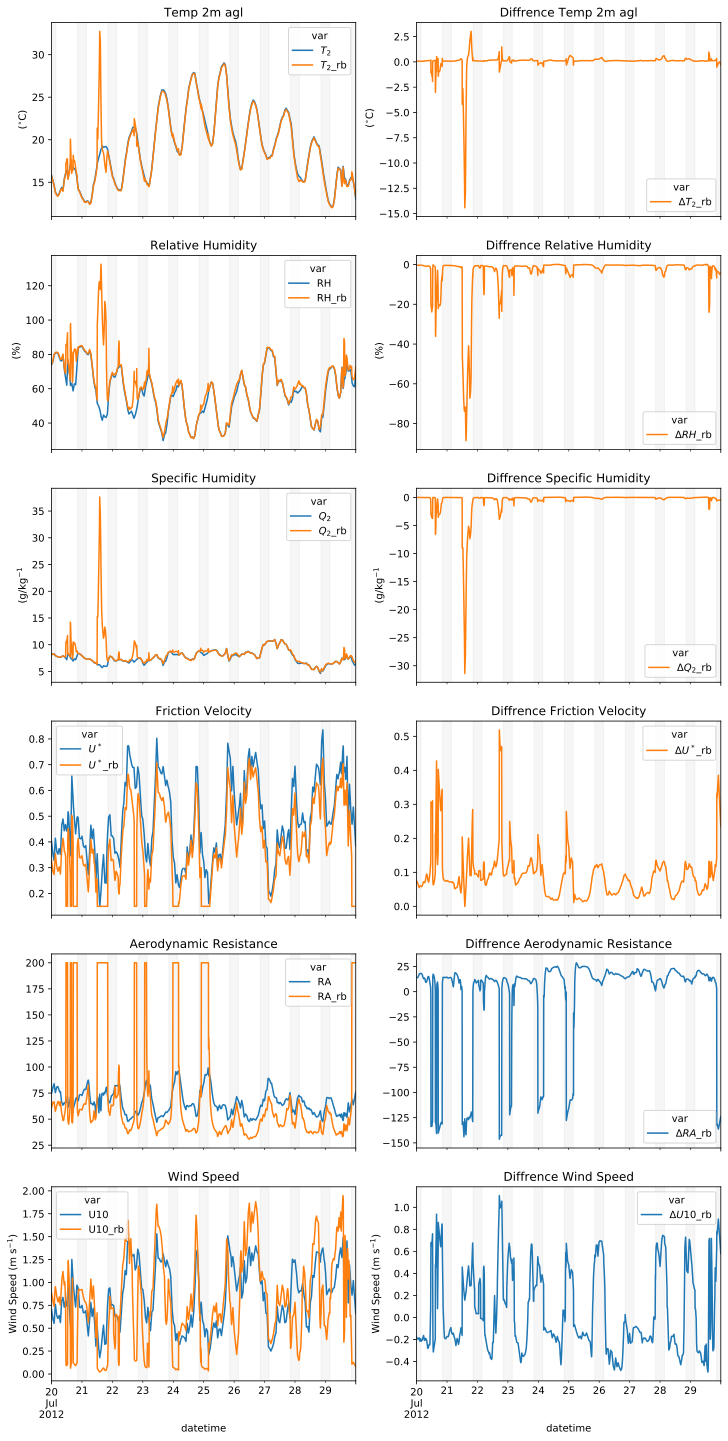

In [31]:
fig, axes = plt.subplots(6, 2, sharex=True)
k = df_merge.loc[s : e ,['T2','T2_rb']].rename(columns=dict_var_disp).plot(ax=axes[0,0],figsize=fsize,title='Temp 2m agl')
l = df_merge.loc[s : e ,['T2_rb_d',]].rename(columns=dict_var_disp).plot(ax=axes[0,1],figsize=fsize,title='Diffrence Temp 2m agl',color=clr)
m = df_merge.loc[s : e ,['RH2','RH2_rb']].rename(columns=dict_var_disp).plot(ax=axes[1,0],figsize=fsize,title='Relative Humidity',)
n = df_merge.loc[s : e ,['RH2_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[1,1],figsize=fsize,title='Diffrence Relative Humidity',color=clr)
o = df_merge.loc[s : e ,['Q2','Q2_rb']].rename(columns=dict_var_disp).plot(ax=axes[2,0],figsize=fsize,title='Specific Humidity',)
p = df_merge.loc[s : e ,['Q2_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[2,1],figsize=fsize,title='Diffrence Specific Humidity',color=clr)
q = df_merge.loc[s : e ,['UStar','UStar_rb']].rename(columns=dict_var_disp).plot(ax=axes[3,0],figsize=fsize,title='Friction Velocity',)
r = df_merge.loc[s : e ,['UStar_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[3,1],figsize=fsize,title='Diffrence Friction Velocity',color=clr)
s1 = df_merge.loc[s : e ,['RA','RA_rb']].rename(columns=dict_var_disp).plot(ax=axes[4,0],figsize=fsize,title='Aerodynamic Resistance',)
t = df_merge.loc[s : e ,['RA_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[4,1],figsize=fsize,title='Diffrence Aerodynamic Resistance')
u = df_merge.loc[s : e ,['U10','U10_rb']].plot(ax=axes[5,0],figsize=fsize,title='Wind Speed')
v = df_merge.loc[s : e ,['U10_rb_d']].rename(columns=dict_var_disp).plot(ax=axes[5,1],figsize=fsize,title='Diffrence Wind Speed')

axes[0,0].set_ylabel('($^{\\circ}}$C)')
axes[0,1].set_ylabel(' ($^{\\circ}}$C)')
axes[1,0].set_ylabel(' (%)')
axes[1,1].set_ylabel(' (%)')
axes[2,0].set_ylabel('(g/$ \mathrm{kg^{-1}}$')
axes[2,1].set_ylabel('(g/$ \mathrm{kg^{-1}}$')
axes[3,0].set_ylabel(' ')
axes[3,1].set_ylabel(' ')
axes[4,0].set_ylabel(' ')
axes[4,1].set_ylabel(' ')
axes[5,0].set_ylabel('Wind Speed (m $\mathrm{s^{-1}}$)')
axes[5,1].set_ylabel('Wind Speed (m $\mathrm{s^{-1}}$)')

for var in [k,l,m,n,o,p,q,r,s1,t,u,v]:
    night(var)




## Test RSL-Plot

In [32]:
s0 = '2012 07 24 00:00'
s6 = '2012 07 25 03:30'
s12= '2012 07 25 12:00'
s18= '2012 07 25 18:00'
s24= '2012 07 26 00:00'

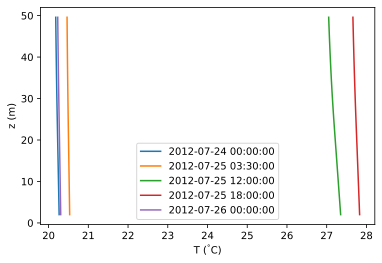

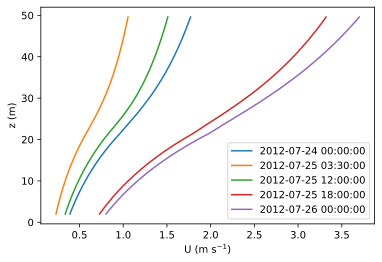

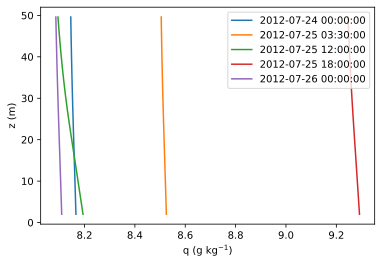

In [33]:
t0  = df_output_rsl_g.loc[s0 : s0]
t6  = df_output_rsl_g.loc[s6 : s6]
t12 = df_output_rsl_g.loc[s12:s12]
t18 = df_output_rsl_g.loc[s18:s18]
t24 = df_output_rsl_g.loc[s24:s24]
df_rsl = pd.concat([t0,t6,t12,t18,t24],join='inner')

sp.util.plot_rsl(df_rsl,'T');
sp.util.plot_rsl(df_rsl,'U');
sp.util.plot_rsl(df_rsl,'q');

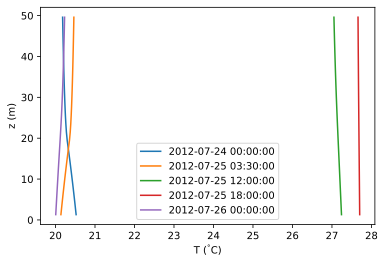

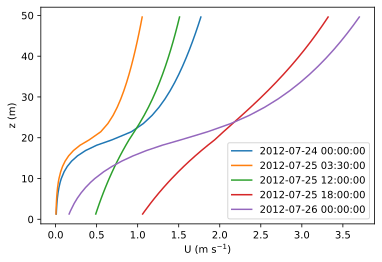

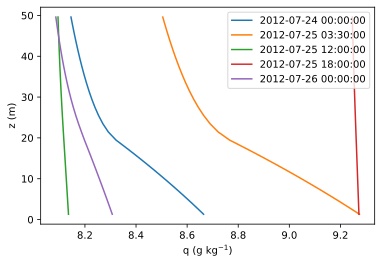

In [35]:
# RuralBuildings _rb

t0_rb  = df_output_rsl_rb_g.loc[s0 : s0]
t6_rb  = df_output_rsl_rb_g.loc[s6 : s6]
t12_rb = df_output_rsl_rb_g.loc[s12:s12]
t18_rb = df_output_rsl_rb_g.loc[s18:s18]
t24_rb = df_output_rsl_rb_g.loc[s24:s24]
df_rsl_rb = pd.concat([t0_rb,t6_rb,t12_rb,t18_rb,t24_rb],join='inner')

sp.util.plot_rsl(df_rsl_rb,'T');
sp.util.plot_rsl(df_rsl_rb,'U');
sp.util.plot_rsl(df_rsl_rb,'q');